In [92]:
!pip install pycaret[full] -q

In [93]:
import pycaret

In [94]:
from pycaret.datasets import get_data
from pycaret.classification import *

In [95]:
import pandas as pd

In [96]:
!pip install xlrd

In [97]:
data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
dataset = (
    pd.read_excel(io=data_url, header=1)
    .drop(columns=["ID"])
    .rename(columns={"PAY_0": "PAY_1", "default payment next month": "default"})
)

dataset.shape

# %%
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [141]:
dataset.columns

Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [98]:
dataset['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [99]:
from pycaret.classification import*
s=setup(dataset,target= 'default')

,Description,Value
0,Session id,2070
1,Target,default
2,Target type,Binary
3,Original data shape,"(30000, 24)"
4,Transformed data shape,"(30000, 24)"
5,Transformed train set shape,"(21000, 24)"
6,Transformed test set shape,"(9000, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [146]:
models = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:31:37
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8184,0.7718,0.3251,0.6899,0.4418,0.3497,0.3851,1.7440
rf,Random Forest Classifier,0.8178,0.7599,0.3733,0.6541,0.4751,0.3748,0.3964,6.1650
lr,Logistic Regression,0.8063,0.7067,0.2329,0.6803,0.3458,0.2636,0.3162,1.7410
ridge,Ridge Classifier,0.8002,0.7195,0.1544,0.7277,0.2546,0.1921,0.2707,0.0590
knn,K Neighbors Classifier,0.7549,0.6037,0.1793,0.3845,0.2445,0.1207,0.1333,0.5260
dt,Decision Tree Classifier,0.7252,0.6148,0.4159,0.3877,0.4012,0.2232,0.2235,0.7220
svm,SVM - Linear Kernel,0.6521,0.5611,0.2263,0.1021,0.0985,-0.0014,0.0000,0.2770
qda,Quadratic Discriminant Analysis,0.5444,0.7198,0.7899,0.3005,0.4346,0.1679,0.2237,0.0770
nb,Naive Bayes,0.4018,0.6687,0.8504,0.2497,0.3861,0.0671,0.1203,0.0580


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [151]:
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8214,0.7899,0.3427,0.6943,0.4589,0.3663,0.3992
1,0.8100,0.7514,0.3039,0.6498,0.4141,0.3181,0.3509
2,0.8157,0.7619,0.3147,0.6791,0.4300,0.3373,0.3729
3,0.8133,0.7772,0.3168,0.6622,0.4286,0.3332,0.3656
4,0.8286,0.7865,0.3448,0.7407,0.4706,0.3841,0.4242
5,0.8138,0.7692,0.3247,0.6623,0.4358,0.3396,0.3705
6,0.8205,0.7779,0.3226,0.7075,0.4431,0.3535,0.3923
7,0.8257,0.7846,0.3570,0.7124,0.4756,0.3847,0.4178
8,0.8205,0.7552,0.3247,0.7056,0.4448,0.3547,0.3928


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8138,0.7722,0.3235,0.6619,0.4345,0.3385,0.3696


,Samples,Accuracy,Recall,Precision,F1,Kappa,MCC,Selection Rate
EDUCATION,,,,,,,,
0,4.0,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1,3154.0,0.828789,0.251994,0.689956,0.369159,0.294073,0.344353,0.072606
2,4238.0,0.804625,0.355289,0.661710,0.462338,0.355942,0.381668,0.126947
3,1452.0,0.794077,0.367232,0.634146,0.465116,0.348643,0.368600,0.141185
4,41.0,0.975610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,95.0,0.936842,0.000000,0.000000,0.000000,-0.017857,-0.024311,0.010526
6,16.0,0.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


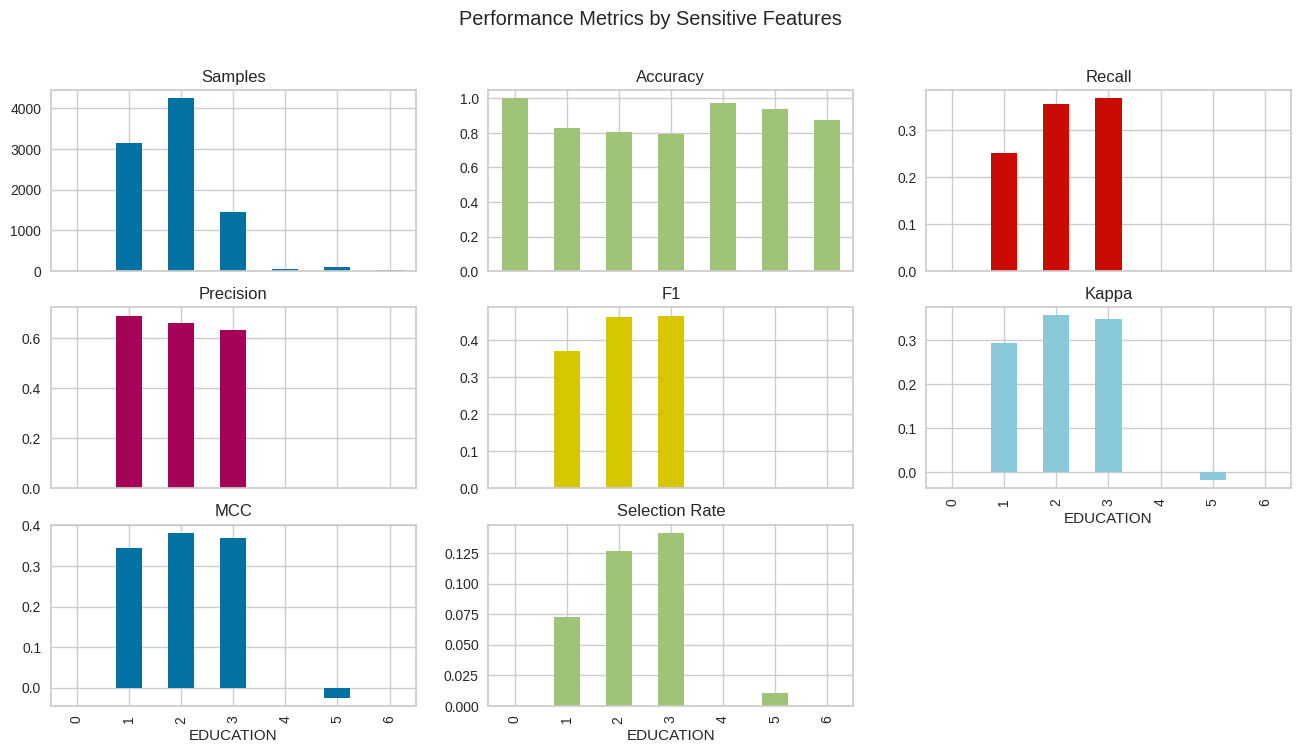

In [153]:
check_fairness(adaboost, ['EDUCATION'])

In [102]:
from sklearn.model_selection import train_test_split

In [156]:
x=dataset.drop(columns=['default'])
y=dataset['default']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [157]:
x.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [180]:
X = x[x.EDUCATION >0]

In [183]:
y = y[x.EDUCATION >0]

In [120]:
dataset.rename(columns={'SEX': 'GENDER'}, inplace=True)

In [184]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [197]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [198]:
# Train a logistic regression model
model = RandomForestClassifier()
model.fit(X_train.drop(columns=['EDUCATION']), y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [199]:
# Make predictions
y_pred = model.predict(X_test.drop(columns=['EDUCATION']))

In [188]:
from sklearn.metrics import accuracy_score

In [200]:

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy: {accuracy:.2f}")

Baseline Accuracy: 0.81


In [201]:
from fairlearn.metrics import MetricFrame, selection_rate, equalized_odds_difference, demographic_parity_difference
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

In [202]:
# Evaluate fairness using MetricFrame
group = X_test['EDUCATION']
metric_frame = MetricFrame(metrics={"accuracy": accuracy_score, "selection_rate": selection_rate},
                           y_true=y_test,
                           y_pred=y_pred,
                           sensitive_features=group)


In [203]:
# Display the metric frame
print("Fairness metrics before mitigation:")
print(metric_frame.by_group)

Fairness metrics before mitigation:
           accuracy  selection_rate
EDUCATION                          
1          0.834204        0.099762
2          0.808594        0.143111
3          0.774619        0.153299
4          0.903226        0.064516
5          0.894737        0.052632
6          0.500000        0.250000


In [ ]:
!pip install --upgrade fairlearn

In [204]:
# Evaluate additional fairness metrics before mitigation
equalized_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=group)
demographic_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=group)
print(f"Equalized Odds Difference before mitigation: {equalized_odds_diff:.2f}")
print(f"Demographic Parity Difference before mitigation: {demographic_parity_diff:.2f}")


Equalized Odds Difference before mitigation: 0.40
Demographic Parity Difference before mitigation: 0.20


In [205]:
# Use ThresholdOptimizer for postprocessing
postprocess_estimator = ThresholdOptimizer(
    estimator=model,
    constraints="demographic_parity",
    predict_method='predict_proba'
)

postprocess_estimator.fit(X_train.drop(columns=['EDUCATION']), y_train, sensitive_features=X_train['EDUCATION'])
y_pred_postprocessed = postprocess_estimator.predict(X_test.drop(columns=['EDUCATION']), sensitive_features=X_test['EDUCATION'])

# Evaluate accuracy and fairness after postprocessing
accuracy_postprocessed = accuracy_score(y_test, y_pred_postprocessed)
metric_frame_postprocessed = MetricFrame(metrics={"accuracy": accuracy_score, "selection_rate": selection_rate},
                                         y_true=y_test,
                                         y_pred=y_pred_postprocessed,
                                         sensitive_features=group)

print(f"Accuracy after postprocessing: {accuracy_postprocessed:.2f}")
print("Fairness metrics after postprocessing:")
print(metric_frame_postprocessed.by_group)



Accuracy after postprocessing: 0.77
Fairness metrics after postprocessing:
           accuracy  selection_rate
EDUCATION                          
1          0.727791        0.319240
2          0.810724        0.130327
3          0.775635        0.101523
4          0.354839        0.677419
5          0.298246        0.719298
6          0.500000        0.750000


In [206]:
# Evaluate additional fairness metrics after postprocessing
equalized_odds_diff_post = equalized_odds_difference(y_test, y_pred_postprocessed, sensitive_features=group)
demographic_parity_diff_post = demographic_parity_difference(y_test, y_pred_postprocessed, sensitive_features=group)
print(f"Equalized Odds Difference after postprocessing: {equalized_odds_diff_post:.2f}")
print(f"Demographic Parity Difference after postprocessing: {demographic_parity_diff_post:.2f}")

Equalized Odds Difference after postprocessing: 0.73
Demographic Parity Difference after postprocessing: 0.65


In [207]:
# Use ExponentiatedGradient for bias mitigation
mitigator = ExponentiatedGradient(RandomForestClassifier(), constraints=DemographicParity())
mitigator.fit(X_train.drop(columns=['EDUCATION']), y_train, sensitive_features=X_train['EDUCATION'])

# Make predictions with the mitigated model
y_pred_mitigated = mitigator.predict(X_test.drop(columns=['EDUCATION']))

# Evaluate accuracy and fairness after mitigation
accuracy_mitigated = accuracy_score(y_test, y_pred_mitigated)
metric_frame_mitigated = MetricFrame(metrics={"accuracy": accuracy_score, "selection_rate": selection_rate},
                                     y_true=y_test,
                                     y_pred=y_pred_mitigated,
                                     sensitive_features=group)

print(f"Accuracy after mitigation: {accuracy_mitigated:.2f}")
print("Fairness metrics after mitigation:")
print(metric_frame_mitigated.by_group)

# Evaluate additional fairness metrics after mitigation
equalized_odds_diff_mitigated = equalized_odds_difference(y_test, y_pred_mitigated, sensitive_features=group)
demographic_parity_diff_mitigated = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=group)
print(f"Equalized Odds Difference after mitigation: {equalized_odds_diff_mitigated:.2f}")
print(f"Demographic Parity Difference after mitigation: {demographic_parity_diff_mitigated:.2f}")


Accuracy after mitigation: 0.80
Fairness metrics after mitigation:
           accuracy  selection_rate
EDUCATION                          
1          0.819002        0.124466
2          0.794744        0.164773
3          0.772589        0.165482
4          0.967742        0.064516
5          0.894737        0.052632
6          0.500000        0.250000
Equalized Odds Difference after mitigation: 1.00
Demographic Parity Difference after mitigation: 0.20


Accuracy after mitigation: 0.72
Fairness metrics after mitigation:
        accuracy  selection_rate
GENDER                          
1       0.711490        0.244796
2       0.732351        0.226515
Equalized Odds Difference after mitigation: 0.02
Demographic Parity Difference after mitigation: 0.02


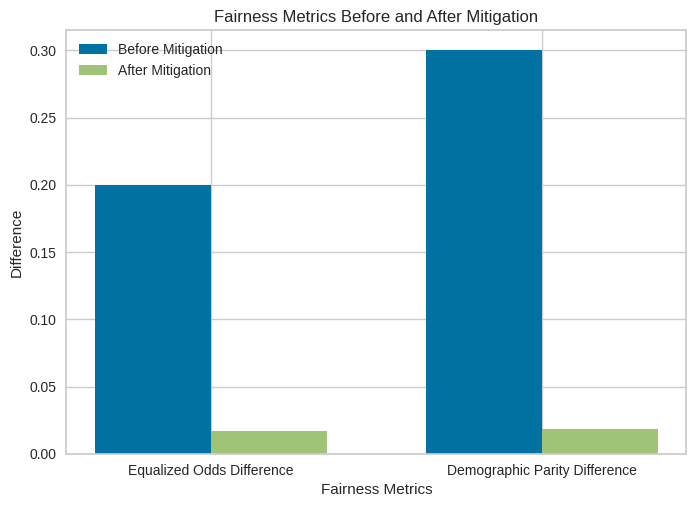

In [142]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import equalized_odds_difference, demographic_parity_difference, MetricFrame, selection_rate
from sklearn.metrics import accuracy_score

# Assuming you already have the data split into X_train, X_test, y_train, y_test, and group

# Train the mitigated model
mitigator = ExponentiatedGradient(DecisionTreeClassifier(), constraints=DemographicParity())
mitigator.fit(X_train.drop(columns=['GENDER']), y_train, sensitive_features=X_train['GENDER'])

# Make predictions with the mitigated model
y_pred_mitigated = mitigator.predict(X_test.drop(columns=['GENDER']))

# Evaluate accuracy and fairness after mitigation
accuracy_mitigated = accuracy_score(y_test, y_pred_mitigated)
metric_frame_mitigated = MetricFrame(metrics={"accuracy": accuracy_score, "selection_rate": selection_rate},
                                     y_true=y_test,
                                     y_pred=y_pred_mitigated,
                                     sensitive_features=group)

print(f"Accuracy after mitigation: {accuracy_mitigated:.2f}")
print("Fairness metrics after mitigation:")
print(metric_frame_mitigated.by_group)

# Evaluate additional fairness metrics after mitigation
equalized_odds_diff_mitigated = equalized_odds_difference(y_test, y_pred_mitigated, sensitive_features=group)
demographic_parity_diff_mitigated = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=group)
print(f"Equalized Odds Difference after mitigation: {equalized_odds_diff_mitigated:.2f}")
print(f"Demographic Parity Difference after mitigation: {demographic_parity_diff_mitigated:.2f}")

# Assuming you have the fairness metrics before mitigation
# Example values for before mitigation (replace these with your actual values)
equalized_odds_diff_before = 0.2
demographic_parity_diff_before = 0.3

# Plot the bar graph
metrics = ['Equalized Odds Difference', 'Demographic Parity Difference']
before_mitigation = [equalized_odds_diff_before, demographic_parity_diff_before]
after_mitigation = [equalized_odds_diff_mitigated, demographic_parity_diff_mitigated]

x = range(len(metrics))

fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(x, before_mitigation, bar_width, label='Before Mitigation')
bar2 = ax.bar([p + bar_width for p in x], after_mitigation, bar_width, label='After Mitigation')

ax.set_xlabel('Fairness Metrics')
ax.set_ylabel('Difference')
ax.set_title('Fairness Metrics Before and After Mitigation')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


Accuracy after mitigation: 0.73
Fairness metrics after mitigation:
        accuracy  selection_rate
GENDER                          
1       0.713156        0.243963
2       0.734853        0.231240
Equalized Odds Difference after mitigation: 0.01
Demographic Parity Difference after mitigation: 0.01
Equalized Odds Difference before mitigation: 0.02
Demographic Parity Difference before mitigation: 0.02


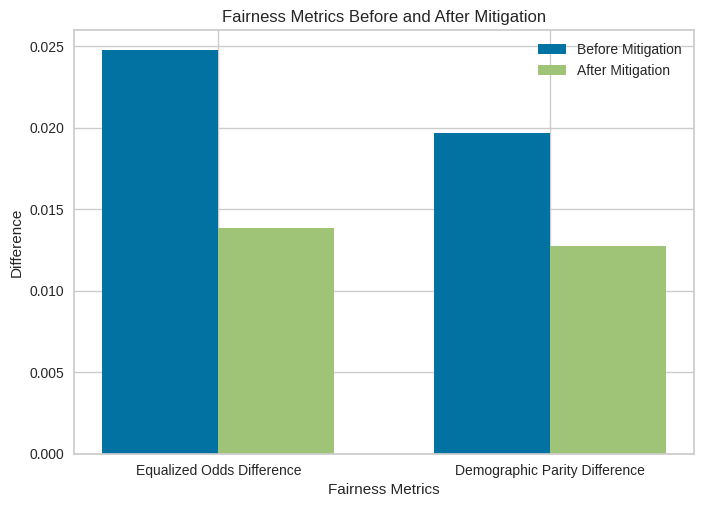

In [143]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import equalized_odds_difference, demographic_parity_difference, MetricFrame, selection_rate
from sklearn.metrics import accuracy_score

# Assuming you already have the data split into X_train, X_test, y_train, y_test, and group

# Train the mitigated model
mitigator = ExponentiatedGradient(DecisionTreeClassifier(), constraints=DemographicParity())
mitigator.fit(X_train.drop(columns=['E']), y_train, sensitive_features=X_train['GENDER'])

# Make predictions with the mitigated model
y_pred_mitigated = mitigator.predict(X_test.drop(columns=['GENDER']))

# Evaluate accuracy and fairness after mitigation
accuracy_mitigated = accuracy_score(y_test, y_pred_mitigated)
metric_frame_mitigated = MetricFrame(metrics={"accuracy": accuracy_score, "selection_rate": selection_rate},
                                     y_true=y_test,
                                     y_pred=y_pred_mitigated,
                                     sensitive_features=group)

print(f"Accuracy after mitigation: {accuracy_mitigated:.2f}")
print("Fairness metrics after mitigation:")
print(metric_frame_mitigated.by_group)

# Evaluate additional fairness metrics after mitigation
equalized_odds_diff_mitigated = equalized_odds_difference(y_test, y_pred_mitigated, sensitive_features=group)
demographic_parity_diff_mitigated = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=group)
print(f"Equalized Odds Difference after mitigation: {equalized_odds_diff_mitigated:.2f}")
print(f"Demographic Parity Difference after mitigation: {demographic_parity_diff_mitigated:.2f}")

# Evaluate fairness metrics before mitigation
y_pred = DecisionTreeClassifier().fit(X_train.drop(columns=['GENDER']), y_train).predict(X_test.drop(columns=['GENDER']))
equalized_odds_diff_before = equalized_odds_difference(y_test, y_pred, sensitive_features=group)
demographic_parity_diff_before = demographic_parity_difference(y_test, y_pred, sensitive_features=group)
print(f"Equalized Odds Difference before mitigation: {equalized_odds_diff_before:.2f}")
print(f"Demographic Parity Difference before mitigation: {demographic_parity_diff_before:.2f}")

# Plot the bar graph
metrics = ['Equalized Odds Difference', 'Demographic Parity Difference']
before_mitigation = [equalized_odds_diff_before, demographic_parity_diff_before]
after_mitigation = [equalized_odds_diff_mitigated, demographic_parity_diff_mitigated]

x = range(len(metrics))

fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(x, before_mitigation, bar_width, label='Before Mitigation')
bar2 = ax.bar([p + bar_width for p in x], after_mitigation, bar_width, label='After Mitigation')

ax.set_xlabel('Fairness Metrics')
ax.set_ylabel('Difference')
ax.set_title('Fairness Metrics Before and After Mitigation')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
